In [7]:
import numpy as np
import pandas as pd
import mlrose_hiive as mlrh
import mlrose 
import matplotlib.pyplot as plt
my_random_state = 318
import time
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score,plot_confusion_matrix
# from sklearn.datasets import load_iris
algorithms = ['GD','RHC', 'SA', 'GA']


In [8]:
###### E-coli 
### http://archive.ics.uci.edu/ml/datasets/Ecoli
# data = pd.read_csv('datafiles/ecoli.csv')))  # very unbalanced
# class_names = np.array(['cp', 'im', 'imL', 'imS', 'imU','om','omL','pp'])
data = pd.read_csv('datafiles/ecoli-balance.csv') # balanced: merged sub-species of E-coli
class_names = np.array(['cp', 'im', 'om','pp'])
y_data = data.Y
x_data = data.loc[:,'X1':'X7']


In [9]:
x_data.shape

(336, 7)

In [10]:

one_hot = OneHotEncoder()

y_data_hot = one_hot.fit_transform(y_data.values.reshape(-1, 1)).todense()
# y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()
y_data_hot.shape

(336, 4)

In [11]:
le = LabelEncoder()
le.fit(y_data.values.tolist())
y_data_le = le.transform(y_data)
y_data_le.shape

(336,)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data_hot, train_size=0.7, random_state=my_random_state, shuffle=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(235, 7) (101, 7) (235, 4) (101, 4)


In [123]:
train_accuracies = np.zeros(4)
test_accuracies = np.zeros(4)
optim_time = np.zeros(4)
train_time = np.zeros(4)
test_time = np.zeros(4)

# 1. gradient_descent

In [127]:
# Initialize neural network object and fit object
tic = time.perf_counter() 
nn = mlrose.NeuralNetwork(hidden_nodes = [20,20,20], # activation = 'relu', 
                                 algorithm = 'gradient_descent', # max_iters = 1000, 
                                 learning_rate = 0.001, # bias = True, is_classifier = True, 
                                 early_stopping = True, clip_max = 5, max_attempts = 100, 
                                 random_state = my_random_state, curve = True)
toc = time.perf_counter() 
optim_time[0] = toc-tic
print(f"optimization time {toc - tic} seconds")
print()


tic = time.perf_counter() 
nn.fit(x_train, y_train)
toc = time.perf_counter() 
train_time[0] = toc-tic
print(f"training time {toc - tic} seconds")
print()

print("Value of loss function for fitted weights when fit is performed\n",nn.loss)
# print("fitted_weights", nn_gd.fitted_weights)
# nn.fitted_weights
nn.fitted_weights.shape
# learning_rate = 0.1
# Value of loss function for fitted weights when fit is performed 1.3862943611198906
# array([-5.        , -0.31964703, -5.        , ...,  5.        ,
#        -5.        , -0.11450284])

# learning_rate = 0.001
# Value of loss function for fitted weights when fit is performed 0.25105686815160916
# array([ 0.09052286, -0.31964703, -0.67567475, ...,  1.29516855,
#         0.22538836,  0.15522131])

optimization time 7.360000017797574e-05 seconds

training time 0.30918449999990116 seconds

Value of loss function for fitted weights when fit is performed
 0.25105686815160916


(1040,)

(24,)

In [128]:
# Predict labels for train set and assess accuracy
y_train_pred = nn.predict(x_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
print(y_train_accuracy)
train_accuracies[0] = y_train_accuracy
# 0.9319148936170213 @ learning_rate = 0.001
# 0.4 @ learning rate = 0.1


# Predict labels for test set and assess accuracy

tic = time.perf_counter() 
y_test_pred = nn.predict(x_test)
toc = time.perf_counter() 
test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")

y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)
test_accuracies[0] = y_test_accuracy
# 0.9306930693069307 @ learning_rate = 0.001
# 0.48514851485148514 @ learning_rate = 0.1

# nn_gd.predicted_probs


# plot_confusion_matrix(nn, x_test, y_test,normalize='true',cmap=plt.cm.Blues)
# plt.savefig('NN/NN_GD_confusion_matrix_normalized.png') 
# plt.show()

nn_gd = nn ## save

0.9319148936170213
testing time 0.0005360000004657195 seconds
0.9306930693069307


# 2. random_hill_climb

In [124]:
tic = time.perf_counter() 
nn = mlrose.NeuralNetwork(hidden_nodes = [20,20,20], # activation = 'relu', 
                                 algorithm = 'random_hill_climb', max_iters = 5000, 
                                 restarts = 3, #learning_rate = 0.001, # bias = True, is_classifier = True, 
                                 early_stopping = True, clip_max = 5, max_attempts = 100, 
                                 random_state = my_random_state, curve = True)
toc = time.perf_counter() 
optim_time[1] = toc-tic
print(f"optimization time {toc - tic} seconds")
print()


tic = time.perf_counter() 
nn.fit(x_train, y_train)
toc = time.perf_counter() 
train_time[1] = toc-tic
print(f"training time {toc - tic} seconds")
print()

print("Value of loss function for fitted weights when fit is performed\n",nn.loss)
# print("fitted_weights", nn_gd.fitted_weights)
# nn.fitted_weights
nn.fitted_weights.shape

optimization time 7.589999950141646e-05 seconds

training time 26.517017600000145 seconds

Value of loss function for fitted weights when fit is performed
 0.22027227910789357


(1040,)

In [126]:
# Predict labels for train set and assess accuracy
y_train_pred = nn.predict(x_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
print(y_train_accuracy)
train_accuracies[1] = y_train_accuracy

# Predict labels for test set and assess accuracy

tic = time.perf_counter() 
y_test_pred = nn.predict(x_test)
toc = time.perf_counter() 
test_time[1] = toc-tic
print(f"testing time {toc - tic} seconds")

y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)
test_accuracies[1] = y_test_accuracy

# nn_gd.predicted_probs


nn_rhc = nn ## save

0.9574468085106383
testing time 0.0003569000000425149 seconds
0.9207920792079208


In [130]:
train_accuracies,test_accuracies, optim_time, train_time, test_time

(array([0.93191489, 0.95744681, 0.        , 0.        ]),
 array([0.93069307, 0.92079208, 0.        , 0.        ]),
 array([7.36000002e-05, 7.58999995e-05, 0.00000000e+00, 0.00000000e+00]),
 array([ 0.3091845, 26.5170176,  0.       ,  0.       ]),
 array([0.000536 , 0.0003569, 0.       , 0.       ]))

# simulated_annealing

In [136]:
tic = time.perf_counter() 
nn = mlrose.NeuralNetwork(hidden_nodes = [20,20,20], # activation = 'relu', 
                                 algorithm = 'simulated_annealing', max_iters = 10000, 
                                 #learning_rate = 0.001, # bias = True, is_classifier = True, 
                                 early_stopping = True, clip_max = 5, max_attempts = 100, 
                                 random_state = my_random_state, curve = True)
toc = time.perf_counter() 
optim_time[2] = toc-tic
print(f"optimization time {toc - tic} seconds")
print()


tic = time.perf_counter() 
nn.fit(x_train, y_train)
toc = time.perf_counter() 
train_time[2] = toc-tic
print(f"training time {toc - tic} seconds")
print()

print("Value of loss function for fitted weights when fit is performed\n",nn.loss)
# print("fitted_weights", nn_gd.fitted_weights)
# nn.fitted_weights
nn.fitted_weights.shape

optimization time 8.160000015777769e-05 seconds

training time 21.46122480000031 seconds

Value of loss function for fitted weights when fit is performed
 0.203311450213503


(1040,)

In [137]:
# Predict labels for train set and assess accuracy
y_train_pred = nn.predict(x_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
print(y_train_accuracy)
train_accuracies[2] = y_train_accuracy

# Predict labels for test set and assess accuracy

tic = time.perf_counter() 
y_test_pred = nn.predict(x_test)
toc = time.perf_counter() 
test_time[2] = toc-tic
print(f"testing time {toc - tic} seconds")

y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)
test_accuracies[2] = y_test_accuracy

# nn_gd.predicted_probs


nn_sa = nn ## save

0.9404255319148936
testing time 0.0007053999997879146 seconds
0.9504950495049505


In [138]:
train_accuracies,test_accuracies, optim_time, train_time, test_time
# (array([0.93191489, 0.95744681, 0.88510638, 0.        ]),
#  array([0.93069307, 0.92079208, 0.91089109, 0.        ]),
#  array([7.36000002e-05, 7.58999995e-05, 8.43999997e-05, 0.00000000e+00]),
#  array([ 0.3091845, 26.5170176,  9.956555 ,  0.       ]),
#  array([0.000536 , 0.0003569, 0.0004006, 0.       ]))

(array([0.93191489, 0.95744681, 0.94042553, 0.        ]),
 array([0.93069307, 0.92079208, 0.95049505, 0.        ]),
 array([7.36000002e-05, 7.58999995e-05, 8.16000002e-05, 0.00000000e+00]),
 array([ 0.3091845, 26.5170176, 21.4612248,  0.       ]),
 array([0.000536 , 0.0003569, 0.0007054, 0.       ]))

## SA: try different schedules

In [13]:
# SA
schedules = [mlrose.GeomDecay(), mlrose.ArithDecay(), mlrose.ExpDecay()]
train_accu_sa = np.zeros(3)
train_time_sa = np.zeros(3)
test_accu_sa = np.zeros(3)
for i in range(len(schedules)):
    nn = mlrose.NeuralNetwork(hidden_nodes = [20,20,20], # activation = 'relu', 
                                 algorithm = 'simulated_annealing', max_iters = 10000, 
                              schedule = schedules[i],
                                 #learning_rate = 0.001, # bias = True, is_classifier = True, 
                                 early_stopping = True, clip_max = 5, max_attempts = 100, 
                                 random_state = my_random_state, curve = True)
    
    tic = time.perf_counter() 
    nn.fit(x_train, y_train)
    toc = time.perf_counter() 
    train_time_sa[i] = toc - tic
    print(f"training time {toc - tic} seconds")
    
    y_train_pred = nn.predict(x_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    print(y_train_accuracy)
    train_accu_sa[i] = y_train_accuracy
    
    y_test_pred = nn.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print(y_test_accuracy)
    test_accu_sa[i] = y_test_accuracy

training time 25.63332140000057 seconds
0.9404255319148936
0.9504950495049505
training time 27.70202259999951 seconds
0.6680851063829787
0.7326732673267327
training time 26.090185699999893 seconds
0.9361702127659575
0.9207920792079208


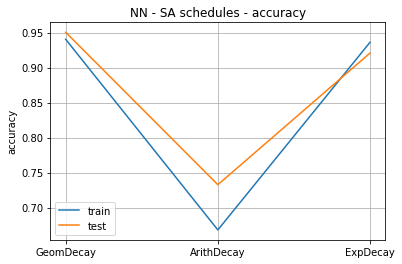

In [15]:
###  accuracy

plt.figure()
plt.plot([1,2,3], train_accu_sa, label = 'train')
plt.plot([1,2,3], test_accu_sa, label = 'test')

schedulesname = ['GeomDecay', 'ArithDecay', 'ExpDecay']
plt.xticks([1,2,3],schedulesname)

plt.title('NN - SA schedules - accuracy')
# plt.xlabel('max_iter')
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.grid()
plt.savefig('NN/SA_schedule_accuracy.png')
plt.show()

# genetic_alg

In [139]:
tic = time.perf_counter() 
nn = mlrose.NeuralNetwork(hidden_nodes = [20,20,20], # activation = 'relu', 
                                 algorithm = 'genetic_alg', max_iters = 1000, 
                                 #learning_rate = 0.001, # bias = True, is_classifier = True, 
                                 early_stopping = True, clip_max = 5, max_attempts = 100, 
                                 random_state = my_random_state, curve = True)
toc = time.perf_counter() 
optim_time[3] = toc-tic
print(f"optimization time {toc - tic} seconds")
print()


tic = time.perf_counter() 
nn.fit(x_train, y_train)
toc = time.perf_counter() 
train_time[3] = toc-tic
print(f"training time {toc - tic} seconds")
print()

print("Value of loss function for fitted weights when fit is performed\n",nn.loss)
# print("fitted_weights", nn_gd.fitted_weights)
# nn.fitted_weights
nn.fitted_weights.shape

optimization time 8.239999988290947e-05 seconds

training time 44.727613900000506 seconds

Value of loss function for fitted weights when fit is performed
 9.349764544883065


(1040,)

In [140]:
# Predict labels for train set and assess accuracy
y_train_pred = nn.predict(x_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
print(y_train_accuracy)
train_accuracies[3] = y_train_accuracy

# Predict labels for test set and assess accuracy

tic = time.perf_counter() 
y_test_pred = nn.predict(x_test)
toc = time.perf_counter() 
test_time[3] = toc-tic
print(f"testing time {toc - tic} seconds")

y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)
test_accuracies[3] = y_test_accuracy

# nn_gd.predicted_probs


nn_ga = nn ## save

0.7191489361702128
testing time 0.00037739999970654026 seconds
0.7425742574257426


In [141]:
train_accuracies,test_accuracies, optim_time, train_time, test_time

(array([0.93191489, 0.95744681, 0.94042553, 0.71914894]),
 array([0.93069307, 0.92079208, 0.95049505, 0.74257426]),
 array([7.36000002e-05, 7.58999995e-05, 8.16000002e-05, 8.23999999e-05]),
 array([ 0.3091845, 26.5170176, 21.4612248, 44.7276139]),
 array([0.000536 , 0.0003569, 0.0007054, 0.0003774]))

## GA: try different population size

In [17]:
# GA
populations = [10,20,50,100,200]
train_accu_ga = np.zeros(5)
train_time_ga = np.zeros(5)
test_accu_ga = np.zeros(5)
for i in range(len(populations)):
    nn = mlrose.NeuralNetwork(hidden_nodes = [20,20,20], # activation = 'relu', 
                                 algorithm = 'genetic_alg', max_iters = 1000, 
                              pop_size = populations[i],
                                 #learning_rate = 0.001, # bias = True, is_classifier = True, 
                                 early_stopping = True, clip_max = 5, max_attempts = 100, 
                                 random_state = my_random_state, curve = True)
    
    tic = time.perf_counter() 
    nn.fit(x_train, y_train)
    toc = time.perf_counter() 
    train_time_ga[i] = toc - tic
    print(f"training time {toc - tic} seconds")
    
    y_train_pred = nn.predict(x_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    print(y_train_accuracy)
    train_accu_ga[i] = y_train_accuracy
    
    y_test_pred = nn.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print(y_test_accuracy)
    test_accu_ga[i] = y_test_accuracy

training time 2.041107099999863 seconds
0.7063829787234043
0.7821782178217822
training time 4.06897360000039 seconds
0.6595744680851063
0.6633663366336634
training time 20.167259899999408 seconds
0.7148936170212766
0.7425742574257426
training time 38.33511770000041 seconds
0.7787234042553192
0.8118811881188119
training time 57.75208459999976 seconds
0.7191489361702128
0.7425742574257426


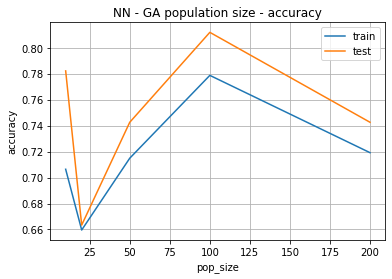

In [18]:
###  accuracy

plt.figure()
plt.plot(populations, train_accu_ga, label = 'train')
plt.plot(populations, test_accu_ga, label = 'test')


plt.title('NN - GA population size - accuracy')
plt.xlabel('pop_size')
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.grid()
plt.savefig('NN/GA_population_accuracy.png')
plt.show()

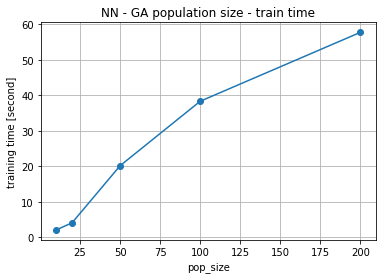

In [21]:
###  time

plt.figure()
plt.plot(populations, train_time_ga,'o-')


plt.title('NN - GA population size - train time')
plt.xlabel('pop_size')
plt.ylabel("training time [second]")
plt.grid()
plt.savefig('NN/GA_population_traintime.png')
plt.show()

## GA: try different mutation_prob

In [22]:
# GA
mut_probs = [0.05,0.1,0.15,0.2,0.25]
train_accu_ga = np.zeros(5)
train_time_ga = np.zeros(5)
test_accu_ga = np.zeros(5)
for i in range(len(populations)):
    nn = mlrose.NeuralNetwork(hidden_nodes = [20,20,20], # activation = 'relu', 
                                 algorithm = 'genetic_alg', max_iters = 1000, 
                              mutation_prob = mut_probs[i], pop_size = 100,
                                 #learning_rate = 0.001, # bias = True, is_classifier = True, 
                                 early_stopping = True, clip_max = 5, max_attempts = 100, 
                                 random_state = my_random_state, curve = True)
    
    tic = time.perf_counter() 
    nn.fit(x_train, y_train)
    toc = time.perf_counter() 
    train_time_ga[i] = toc - tic
    print(f"training time {toc - tic} seconds")
    
    y_train_pred = nn.predict(x_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    print(y_train_accuracy)
    train_accu_ga[i] = y_train_accuracy
    
    y_test_pred = nn.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print(y_test_accuracy)
    test_accu_ga[i] = y_test_accuracy

training time 22.574888299999657 seconds
0.7191489361702128
0.8118811881188119
training time 38.26985280000008 seconds
0.7787234042553192
0.8118811881188119
training time 51.3757813000002 seconds
0.7446808510638298
0.7821782178217822
training time 29.79970609999964 seconds
0.7319148936170212
0.7623762376237624
training time 41.02436260000013 seconds
0.7659574468085106
0.7326732673267327


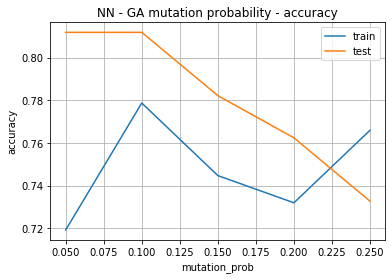

In [24]:
###  accuracy

plt.figure()
plt.plot(mut_probs, train_accu_ga, label = 'train')
plt.plot(mut_probs, test_accu_ga, label = 'test')


plt.title('NN - GA mutation probability - accuracy')
plt.xlabel('mutation_prob')
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.grid()
plt.savefig('NN/GA_mutprob_accuracy.png')
plt.show()

No handles with labels found to put in legend.


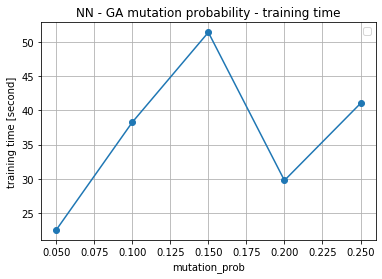

In [25]:
###  time

plt.figure()
plt.plot(mut_probs, train_time_ga, 'o-')


plt.title('NN - GA mutation probability - training time')
plt.xlabel('mutation_prob')
plt.ylabel("training time [second]")
plt.grid()
plt.savefig('NN/GA_mutprob_traintime.png')
plt.show()

# Accuracy & Time

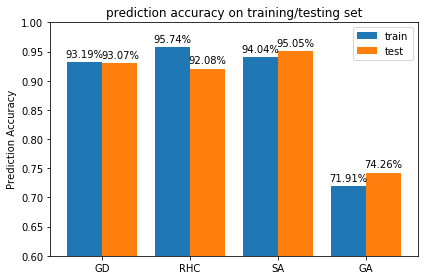

In [165]:
#### https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

width = 0.4  # the width of the bars
x = np.arange(len(algorithms))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='train')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='test')

plt.gca().set_ylim(0.6, 1.0)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prediction Accuracy')
ax.set_title('prediction accuracy on training/testing set')
ax.set_xticks(x)
ax.set_xticklabels(['GD','RHC','SA','GA'])
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.2f}%'.format(height*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('NN/accuracy.png') 

plt.show()

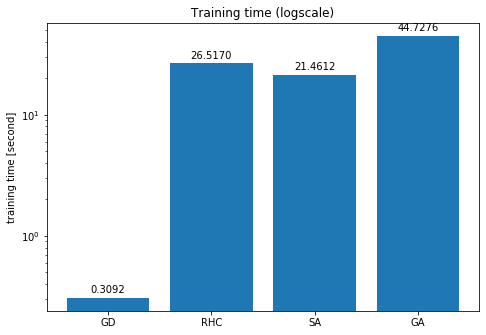

In [171]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

rects = ax.bar(['GD','RHC','SA','GA'],train_time)


def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

# plt.ylim(.1, 2000)
plt.title('Training time (logscale)')
ax.set_yscale('log')
# plt.xlabel('classifiers')
plt.ylabel("training time [second]")
plt.savefig('NN/training_time.png') 
plt.show()


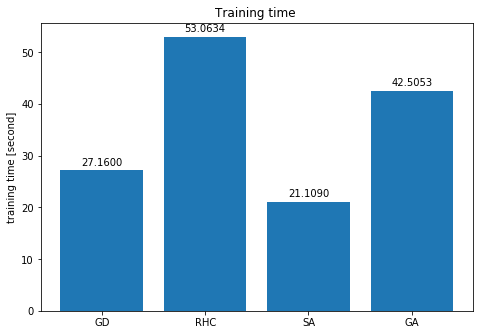

In [4]:
## correcting the training time (equal iteration)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

rects = ax.bar(['GD','RHC','SA','GA'],[27.1600265,53.0633963,21.1090359,42.5052815 ])


def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

# plt.ylim(.1, 2000)
plt.title('Training time ')
# ax.set_yscale('log')
# plt.xlabel('classifiers')
plt.ylabel("training time [second]")
plt.savefig('NN/training_time_10000.png') 
plt.show()

# fitness curve

In [ ]:
numiters = [100,500,1000,2000,5000,10000]
train_accu_fit = np.zeros((4,6))
train_time_fit = np.zeros((4,6))
test_accu_fit = np.zeros((4,6))
algorithms = ['gradient_descent','random_hill_climb','simulated_annealing','genetic_alg']

In [ ]:
# gradient_descent
for i in range(len(numiters)):
    it = numiters[i]
    nn = mlrose.NeuralNetwork(hidden_nodes = [20,20,20], # activation = 'relu', 
                                 algorithm = 'gradient_descent', max_iters = it, 
                                 learning_rate = 0.001, # bias = True, is_classifier = True, 
                                 early_stopping = True, clip_max = 5, max_attempts = 100, 
                                 random_state = my_random_state, curve = True)
    
    tic = time.perf_counter() 
    nn.fit(x_train, y_train)
    toc = time.perf_counter() 
    train_time_fit[0][i] = toc - tic
    print(f"training time {toc - tic} seconds")
    
    y_train_pred = nn.predict(x_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    print(y_train_accuracy)
    train_accu_fit[0][i] = y_train_accuracy
    
    y_test_pred = nn.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print(y_test_accuracy)
    test_accu_fit[0][i] = y_test_accuracy

In [147]:
# RHC
for i in range(len(numiters)):
    it = numiters[i]
    nn = mlrose.NeuralNetwork(hidden_nodes = [20,20,20], # activation = 'relu', 
                                 algorithm = algorithms[1], max_iters = it, 
                                 restarts = 3,#learning_rate = 0.001, # bias = True, is_classifier = True, 
                                 early_stopping = True, clip_max = 5, max_attempts = 100, 
                                 random_state = my_random_state, curve = True)
    
    tic = time.perf_counter() 
    nn.fit(x_train, y_train)
    toc = time.perf_counter() 
    train_time_fit[1][i] = toc - tic
    print(f"training time {toc - tic} seconds")
    
    y_train_pred = nn.predict(x_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    print(y_train_accuracy)
    train_accu_fit[1][i] = y_train_accuracy
    
    y_test_pred = nn.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print(y_test_accuracy)
    test_accu_fit[1][i] = y_test_accuracy

training time 0.5764629999994213 seconds
0.26382978723404255
0.31683168316831684
training time 2.7622357999998712 seconds
0.39574468085106385
0.49504950495049505
training time 5.37989590000052 seconds
0.7319148936170212
0.801980198019802
training time 10.868961999999556 seconds
0.8382978723404255
0.8613861386138614
training time 27.430368700000145 seconds
0.9574468085106383
0.9207920792079208
training time 53.06339630000002 seconds
0.9617021276595744
0.9207920792079208


In [154]:
# SA
for i in range(len(numiters)):
    it = numiters[i]
    nn = mlrose.NeuralNetwork(hidden_nodes = [20,20,20], # activation = 'relu', 
                                 algorithm = algorithms[2], max_iters = it, 
                                 #learning_rate = 0.001, # bias = True, is_classifier = True, 
                                 early_stopping = True, clip_max = 5, max_attempts = 100, 
                                 random_state = my_random_state, curve = True)
    
    tic = time.perf_counter() 
    nn.fit(x_train, y_train)
    toc = time.perf_counter() 
    train_time_fit[2][i] = toc - tic
    print(f"training time {toc - tic} seconds")
    
    y_train_pred = nn.predict(x_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    print(y_train_accuracy)
    train_accu_fit[2][i] = y_train_accuracy
    
    y_test_pred = nn.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print(y_test_accuracy)
    test_accu_fit[2][i] = y_test_accuracy

training time 0.21174340000106895 seconds
0.2297872340425532
0.26732673267326734
training time 1.1257767000006424 seconds
0.12340425531914893
0.15841584158415842
training time 2.2742057999985263 seconds
0.39574468085106385
0.4752475247524752
training time 4.511489399999846 seconds
0.6723404255319149
0.7425742574257426
training time 10.49516550000044 seconds
0.8851063829787233
0.9108910891089109
training time 21.10903590000089 seconds
0.9404255319148936
0.9504950495049505


In [155]:
# GA
for i in range(len(numiters)):
    it = numiters[i]
    nn = mlrose.NeuralNetwork(hidden_nodes = [20,20,20], # activation = 'relu', 
                                 algorithm = algorithms[3], max_iters = it, 
                                 #learning_rate = 0.001, # bias = True, is_classifier = True, 
                                 early_stopping = True, clip_max = 5, max_attempts = 100, 
                                 random_state = my_random_state, curve = True)
    
    tic = time.perf_counter() 
    nn.fit(x_train, y_train)
    toc = time.perf_counter() 
    train_time_fit[3][i] = toc - tic
    print(f"training time {toc - tic} seconds")
    
    y_train_pred = nn.predict(x_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    print(y_train_accuracy)
    train_accu_fit[3][i] = y_train_accuracy
    
    y_test_pred = nn.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print(y_test_accuracy)
    test_accu_fit[3][i] = y_test_accuracy

training time 29.65240300000005 seconds
0.7191489361702128
0.7425742574257426
training time 44.848994899999525 seconds
0.7191489361702128
0.7425742574257426
training time 42.85017719999996 seconds
0.7191489361702128
0.7425742574257426
training time 42.53448750000098 seconds
0.7191489361702128
0.7425742574257426
training time 42.389377699999386 seconds
0.7191489361702128
0.7425742574257426
training time 42.50528149999991 seconds
0.7191489361702128
0.7425742574257426


In [156]:
    

train_accu_fit,train_time_fit,test_accu_fit

(array([[0.93191489, 0.96595745, 0.95744681, 0.9787234 , 1.        ,
         1.        ],
        [0.26382979, 0.39574468, 0.73191489, 0.83829787, 0.95744681,
         0.96170213],
        [0.22978723, 0.12340426, 0.39574468, 0.67234043, 0.88510638,
         0.94042553],
        [0.71914894, 0.71914894, 0.71914894, 0.71914894, 0.71914894,
         0.71914894]]),
 array([[ 0.2817733,  1.4415006,  2.7712845,  5.6940976, 14.3111007,
         27.1600265],
        [ 0.576463 ,  2.7622358,  5.3798959, 10.868962 , 27.4303687,
         53.0633963],
        [ 0.2117434,  1.1257767,  2.2742058,  4.5114894, 10.4951655,
         21.1090359],
        [29.652403 , 44.8489949, 42.8501772, 42.5344875, 42.3893777,
         42.5052815]]),
 array([[0.93069307, 0.93069307, 0.93069307, 0.93069307, 0.92079208,
         0.91089109],
        [0.31683168, 0.4950495 , 0.8019802 , 0.86138614, 0.92079208,
         0.92079208],
        [0.26732673, 0.15841584, 0.47524752, 0.74257426, 0.91089109,
         0.950495

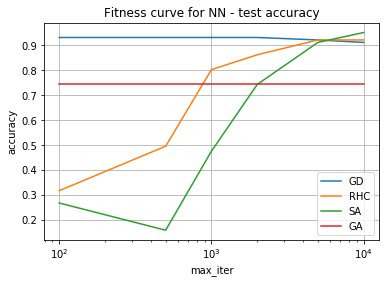

In [157]:
### test accuracy
plt.figure()
plt.semilogx(numiters, test_accu_fit[0], label = 'GD')
plt.semilogx(numiters, test_accu_fit[1], label = 'RHC')
plt.semilogx(numiters, test_accu_fit[2], label = 'SA')
plt.semilogx(numiters, test_accu_fit[3], label = 'GA')


plt.title('Fitness curve for NN - test accuracy')
plt.xlabel('max_iter')
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.grid()
plt.savefig('NN/fitness_testaccuracy.png')
plt.show()

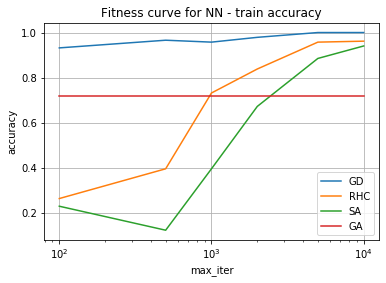

In [161]:
### train accuracy
plt.figure()
plt.semilogx(numiters, train_accu_fit[0], label = 'GD')
plt.semilogx(numiters, train_accu_fit[1], label = 'RHC')
plt.semilogx(numiters, train_accu_fit[2], label = 'SA')
plt.semilogx(numiters, train_accu_fit[3], label = 'GA')


plt.title('Fitness curve for NN - train accuracy')
plt.xlabel('max_iter')
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.grid()
plt.savefig('NN/fitness_trainaccuracy.png')
plt.show()

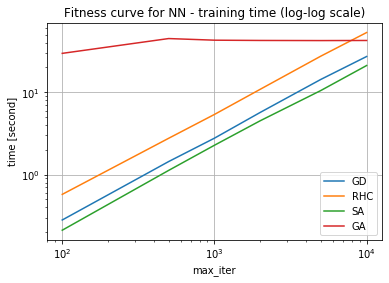

In [159]:
### train time
plt.figure()
plt.semilogx(numiters, train_time_fit[0], label = 'GD')
plt.semilogx(numiters, train_time_fit[1], label = 'RHC')
plt.semilogx(numiters, train_time_fit[2], label = 'SA')
plt.semilogx(numiters, train_time_fit[3], label = 'GA')


plt.title('Fitness curve for NN - training time (log-log scale)')
plt.xlabel('max_iter')
plt.yscale("log")
plt.ylabel("time [second]")
plt.legend(loc="best")
plt.grid()
plt.savefig('NN/fitness_traintime.png')
plt.show()